In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

In [2]:
with open('../../data/pickle/20221013v4_30y.pickle', mode='rb') as f:
    England = pickle.load(f)

In [3]:
#England = ProSoccerLeague(name="england", leagues=[L1, L2, L3])
all_member = pd.DataFrame()
for l in England.leagues:
    for t in l.teams:
        for p in t.affilation_players:
            buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
            all_member = pd.concat([all_member, buff])
for p in England.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])

for p in England.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])
all_member = all_member.reset_index(drop=True)

In [4]:
output = England.players_result
end_year = 2030

## Rateの分布

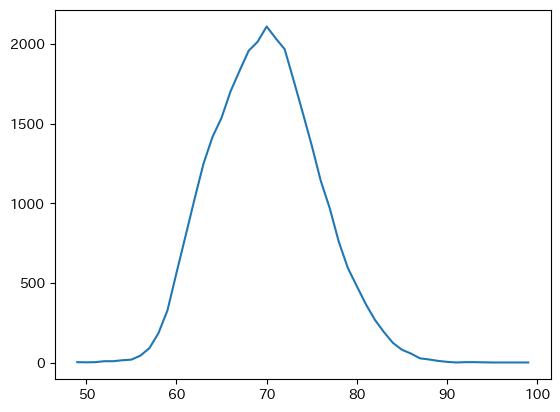

In [5]:
rate_list = output["Rate"].unique()
rate_list.sort()
rate_num = []
for rate in rate_list:
    rate_num.append(len(output.groupby("Rate").get_group(rate).groupby("uuid").mean()))
plt.plot(rate_list, rate_num)

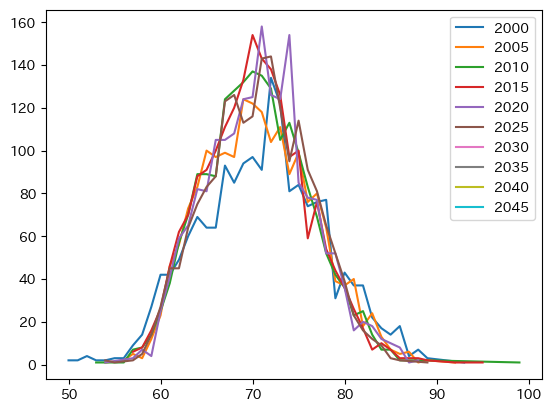

In [6]:
for i in range(2000, 2050, 5):
    output_ = output[output["年度"]==i]
    rate_list = output_["Rate"].unique()
    rate_list.sort()
    rate_num = []
    for rate in rate_list:
        rate_num.append(len(output_.groupby("Rate").get_group(rate).groupby("uuid").mean()))
    plt.plot(rate_list, rate_num, label=i)
plt.legend()
plt.show()

## ポジションごとのrate

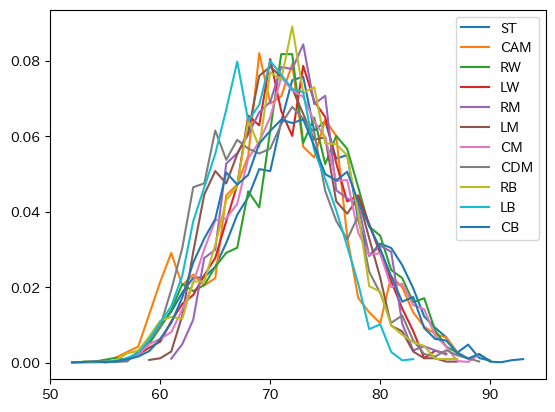

In [7]:
for pos in ALL_POSITON:
    output_ = output[output["ポジション"]==pos]
    if len(output_) < 100:
        continue
    b = output_["Rate"].value_counts().sort_index()
    x = output_["Rate"].unique()
    x.sort()
    plt.plot(x, b/len(output_), label=pos)
plt.legend()
plt.show()

In [8]:
output.groupby("ポジション")["Rate"].describe()

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,2095.0,71.166587,5.980582,56.0,67.0,71.0,75.00,87.0
CB,14568.0,72.174286,5.960514,52.0,68.0,72.0,76.00,93.0
CDM,6057.0,70.416873,5.623455,52.0,66.0,70.0,74.00,89.0
CM,8877.0,72.231835,5.680375,55.0,68.0,72.0,76.00,89.0
GK,9187.0,71.289866,6.085098,49.0,67.0,72.0,76.00,99.0
LB,6285.0,69.689419,4.686678,54.0,66.0,70.0,73.00,83.0
LM,6728.0,71.222206,4.879990,59.0,68.0,71.0,75.00,87.0
LW,5004.0,71.977218,5.252174,53.0,68.0,72.0,76.00,86.0
LWB,35.0,65.114286,4.323475,56.0,62.0,66.0,67.50,75.0


## 年代別

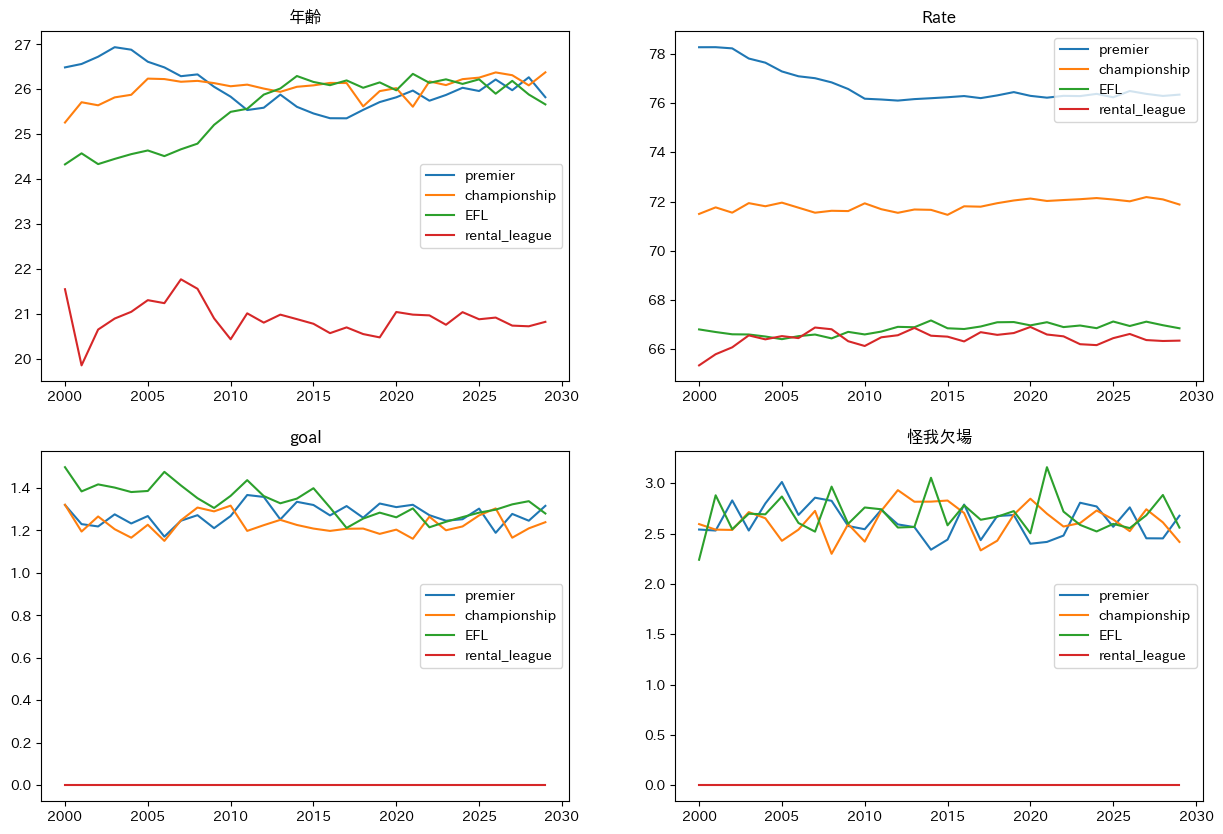

In [9]:
columns = ["年齢", "Rate", "goal", "怪我欠場"]
plt.figure(figsize=(15, 10))
for i, cl in enumerate(columns):
    plt.subplot(2, 2, i+1)
    for league_num in range(3):
        output_ = output[output["リーグ"]==England.leagues[league_num].name]
        plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label=England.leagues[league_num].name)
    output_ = output[output["リーグ"]=="rental_league"]
    plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label="rental_league")
    plt.title(cl)
    plt.legend()

In [10]:
output_ = output[output["Rate"]>84]
for year in range(2000, end_year, 4):
    _output_ = output_[output_["年度"]==year]
    display(_output_.groupby("Rate").count())

,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
86,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
87,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
88,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
89,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
93,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
86,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
87,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
88,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
89,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
93,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
86,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
87,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
88,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
96,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
86,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
88,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
90,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
92,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
99,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,14,14,14,14,12,14,14,14,14,14,14,14,14,14,14,14,14,14
86,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
88,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
93,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
86,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
88,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
86,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
Rate,,,,,,,,,,,,,,,,,,
85,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [11]:
for year in range(2000, end_year, 10):
    output_ = output[((output["年度"]>=year))]
    output_ = output_[output_["年度"]<year+10]
    display(output_.groupby("ポジション")["Rate"].describe())

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,693.0,72.541126,6.869350,57.0,68.0,72.0,77.0,87.0
CB,4848.0,72.899959,6.689070,54.0,68.0,73.0,78.0,93.0
CDM,1935.0,71.337468,6.366139,58.0,66.0,71.0,76.0,89.0
CM,2929.0,72.400137,6.139683,58.0,68.0,72.0,77.0,89.0
GK,2691.0,70.493497,6.599669,49.0,66.0,71.0,75.0,99.0
LB,2056.0,70.251946,5.226895,57.0,66.0,71.0,74.0,83.0
LM,2275.0,71.701099,5.061832,59.0,68.0,72.0,75.0,87.0
LW,1622.0,71.664612,5.190721,53.0,68.0,72.0,75.0,86.0
LWB,15.0,65.733333,5.391351,56.0,62.0,66.0,68.5,75.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,710.0,70.970423,5.719881,56.0,68.00,71.0,75.0,84.0
CB,4981.0,71.602891,5.568351,52.0,68.00,71.0,75.0,93.0
CDM,2095.0,70.119809,5.290552,56.0,66.00,70.0,74.0,87.0
CM,2945.0,71.641766,5.337109,55.0,68.00,72.0,75.0,86.0
GK,3266.0,71.777404,6.112603,55.0,67.00,72.0,76.0,99.0
LB,2122.0,69.275212,4.485677,54.0,66.00,69.0,72.0,83.0
LM,2216.0,71.053249,4.841120,60.0,67.75,71.0,74.0,85.0
LW,1679.0,71.846933,5.429451,56.0,68.00,72.0,75.0,86.0
LWB,11.0,64.727273,4.076540,57.0,61.50,66.0,67.5,70.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,692.0,69.991329,4.924017,56.0,67.0,71.0,73.0,83.0
CB,4739.0,72.032496,5.474007,54.0,68.0,72.0,76.0,88.0
CDM,2027.0,69.845091,5.067723,52.0,66.0,70.0,73.0,87.0
CM,3003.0,72.646354,5.491876,56.0,69.0,73.0,76.0,89.0
GK,3230.0,71.460372,5.520547,53.0,67.0,72.0,76.0,86.0
LB,2107.0,69.557665,4.256482,55.0,66.0,70.0,73.0,82.0
LM,2237.0,70.902548,4.691215,59.0,67.0,71.0,74.0,84.0
LW,1703.0,72.403406,5.105920,56.0,69.0,73.0,76.0,83.0
LWB,9.0,64.555556,2.554952,61.0,64.0,64.0,65.0,70.0


## 18歳のRate

In [12]:
output[output["年齢"]==18]["Rate"].value_counts().sort_index()

53      2
54      2
55      3
56     19
57     37
58    111
59    172
60    289
61    350
62    400
63    429
64    417
65    451
66    443
67    488
68    507
69    518
70    497
71    427
72    297
73    210
74    115
75     60
76     43
77     35
78     26
79     20
80     10
Name: Rate, dtype: int64

In [13]:
output[((output["年齢"]==18)&(output["Rate"]==79))]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
7271,Matthews,d16381ec-4aff-11ed-a99e-00155d479737,18,79,5,LM,premier,2002,Manchester,,リーグ,4位,27,2,2,6,0,0,
7296,Matthews,d16381ec-4aff-11ed-a99e-00155d479737,18,79,5,LM,premier,2002,Manchester,,カップ戦,4位,1,0,0,1,0,0,
7422,Sekai,d163c35a-4aff-11ed-a99e-00155d479737,18,79,5,LM,premier,2002,Edinburgh,,リーグ,18位,3,0,0,0,0,0,
7447,Sekai,d163c35a-4aff-11ed-a99e-00155d479737,18,79,5,LM,premier,2002,Edinburgh,,カップ戦,18位,0,0,0,0,0,0,
8671,Deyshawn,d166794c-4aff-11ed-a99e-00155d479737,18,79,5,ST,championship,2002,Stoke-on-Trent,,リーグ,4位,28,19,3,7,12,3,
8696,Deyshawn,d166794c-4aff-11ed-a99e-00155d479737,18,79,5,ST,championship,2002,Stoke-on-Trent,,カップ戦,4位,2,0,0,1,0,0,
29817,Buford,e8b7aefe-4aff-11ed-a99e-00155d479737,18,79,4,ST,EFL,2008,Duisburg,,リーグ,17位,33,15,5,7,6,1,
29842,Buford,e8b7aefe-4aff-11ed-a99e-00155d479737,18,79,4,ST,EFL,2008,Duisburg,,カップ戦,17位,1,0,0,0,0,0,
50000,Jerzey,00e8f8c0-4b00-11ed-a99e-00155d479737,18,79,4,ST,EFL,2014,Middlesbrough,,リーグ,13位,30,11,4,3,9,2,
50025,Jerzey,00e8f8c0-4b00-11ed-a99e-00155d479737,18,79,4,ST,EFL,2014,Middlesbrough,,カップ戦,13位,2,1,0,0,0,0,


## 怪我割合

In [14]:
print(output["怪我欠場"].sum()/3/20/(end_year-2000))
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

132.1572222222222
0     42134
1      4180
2      2120
3      1862
4      1614
5      1500
6      1450
7      1385
8      1292
9      1158
10     1103
11      998
12      913
13      866
14      725
15      664
16      663
17      600
18      523
19      390
20      385
21      321
22      313
23      271
24      207
25      194
26      166
27      124
28      116
29      103
30       75
31       62
32       56
34       36
33       34
36       24
37       23
35       21
38        3
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [15]:
output[output["Rate"]>95].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,goal,assist,CS,怪我欠場,怪我回数
uuid,,,,,,,,,,
ce6c4d70-4aff-11ed-a99e-00155d479737,28.0,98.0,1.571429,2011.0,19.214286,0.0,0.0,11.357143,2.785714,0.571429


## チーム能力

In [16]:
for t in England.leagues[0].teams:
    print(t.name, t.formation.team_rate)

Newark {'ATT': 85.5, 'MID': 77.25, 'DEF': 79.75, 'GK': 80, 'ALL': 79.9090909090909}
Sunderland {'ATT': 77.33333333333333, 'MID': 72.5, 'DEF': 78.33333333333333, 'GK': 77, 'ALL': 75.81818181818181}
Aberdeen {'ATT': 79.0, 'MID': 72.5, 'DEF': 76.0, 'GK': 82, 'ALL': 76.0909090909091}
Wrexham {'ATT': 81.0, 'MID': 75.0, 'DEF': 77.66666666666667, 'GK': 78, 'ALL': 77.63636363636364}
Kristiania {'ATT': 81.33333333333333, 'MID': 74.33333333333333, 'DEF': 76.75, 'GK': 81, 'ALL': 77.72727272727273}
Richmond {'ATT': 75.33333333333333, 'MID': 76.66666666666667, 'DEF': 73.25, 'GK': 78, 'ALL': 75.18181818181819}
Nottingham {'ATT': 80.0, 'MID': 71.25, 'DEF': 78.0, 'GK': 77, 'ALL': 76.0}
Gothenburg {'ATT': 78.33333333333333, 'MID': 76.33333333333333, 'DEF': 75.0, 'GK': 79, 'ALL': 76.63636363636364}
Swansea {'ATT': 79.0, 'MID': 77.5, 'DEF': 75.25, 'GK': 79, 'ALL': 77.0909090909091}
Karlsruhe {'ATT': 77.33333333333333, 'MID': 74.66666666666667, 'DEF': 77.75, 'GK': 78, 'ALL': 76.81818181818181}
Bristol {'A

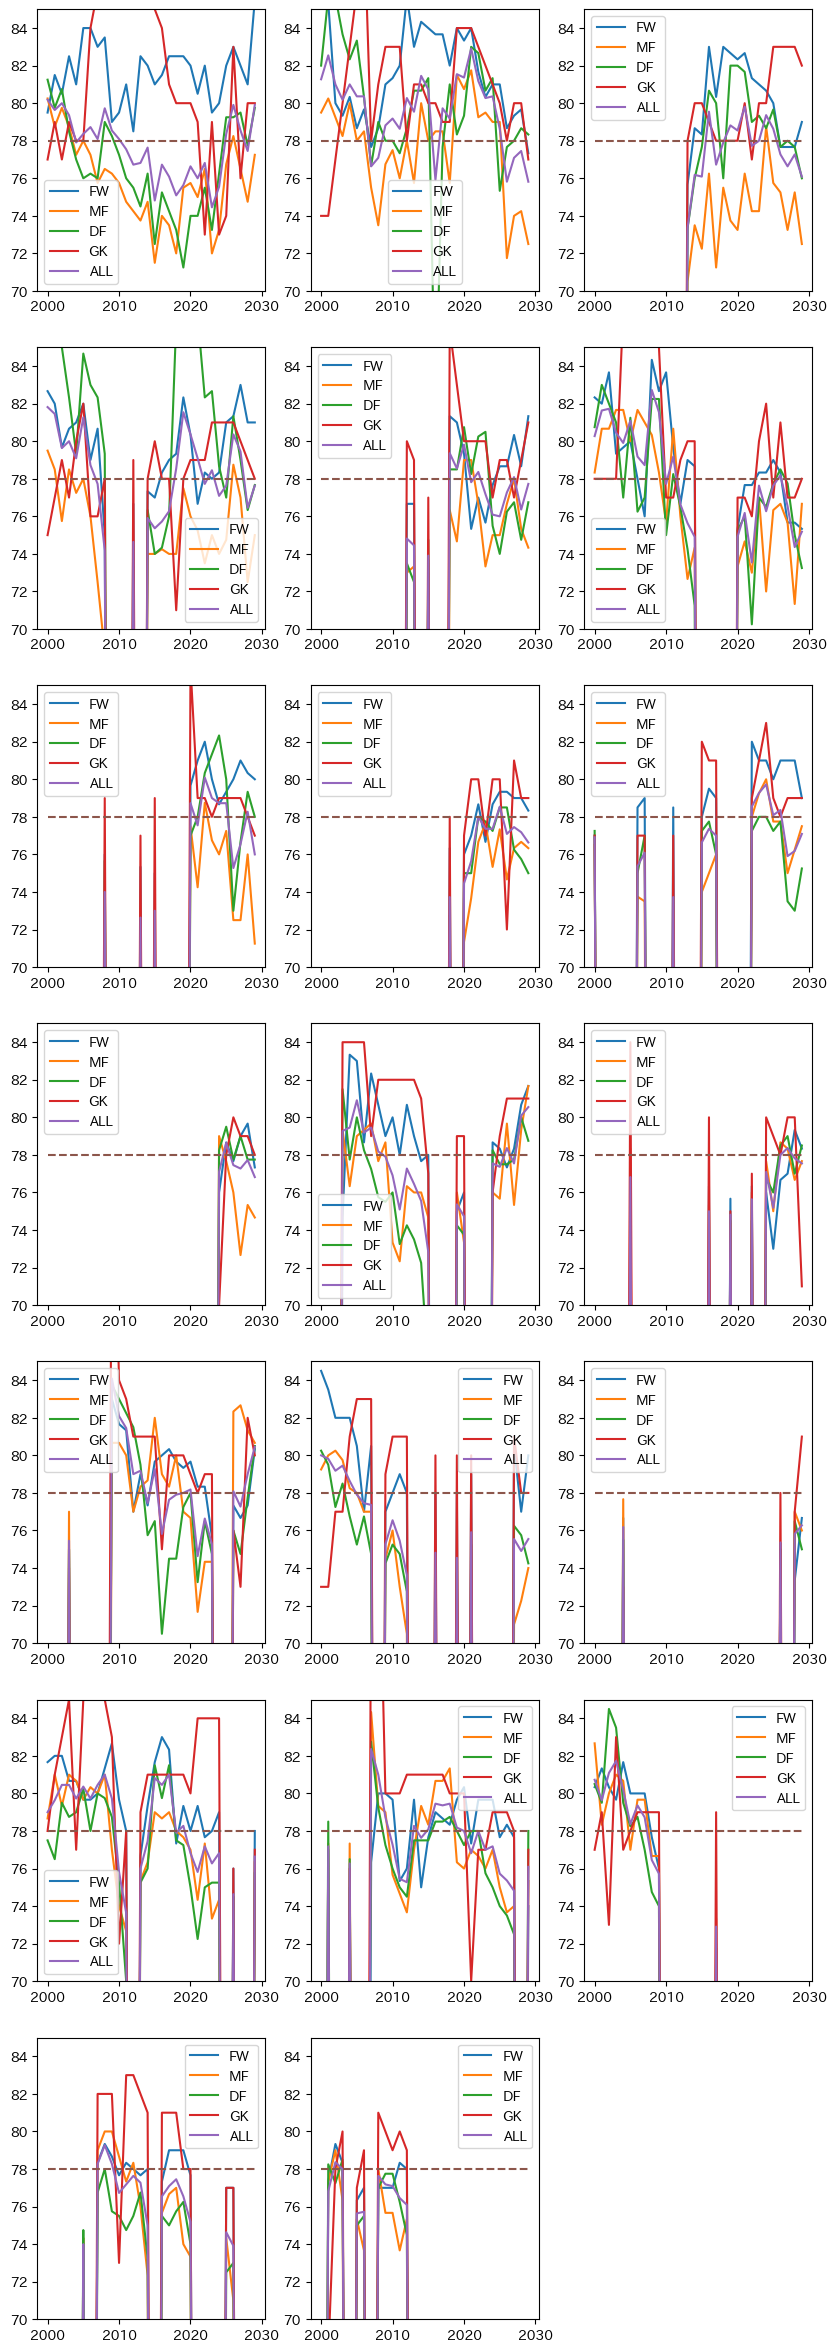

In [17]:
plt.figure(figsize=(10, 30))
for i, t in enumerate(England.leagues[0].teams):
    plt.subplot(7, 3, i+1)

    att = []
    mid = []
    dee = []
    gk = []
    al = []
    y = [y for y in range(2000, end_year)]
    for key, value in t.formation_rate.items():
        if "premier" in key:
            att.append(value["ATT"])
            mid.append(value["MID"])
            dee.append(value["DEF"])
            gk.append(value["GK"])
            al.append(value["ALL"])
        else:
            att.append(0)
            mid.append(0)
            dee.append(0)
            gk.append(0)
            al.append(0)

    plt.plot(y, att, label="FW")
    plt.plot(y, mid, label="MF")
    plt.plot(y, dee, label="DF")
    plt.plot(y, gk, label="GK")
    plt.plot(y, al, label="ALL")
    plt.plot(y, [78 for y in range(2000, end_year)], linestyle="dashed")
    plt.ylim(70, 85)
    plt.legend()
plt.show()

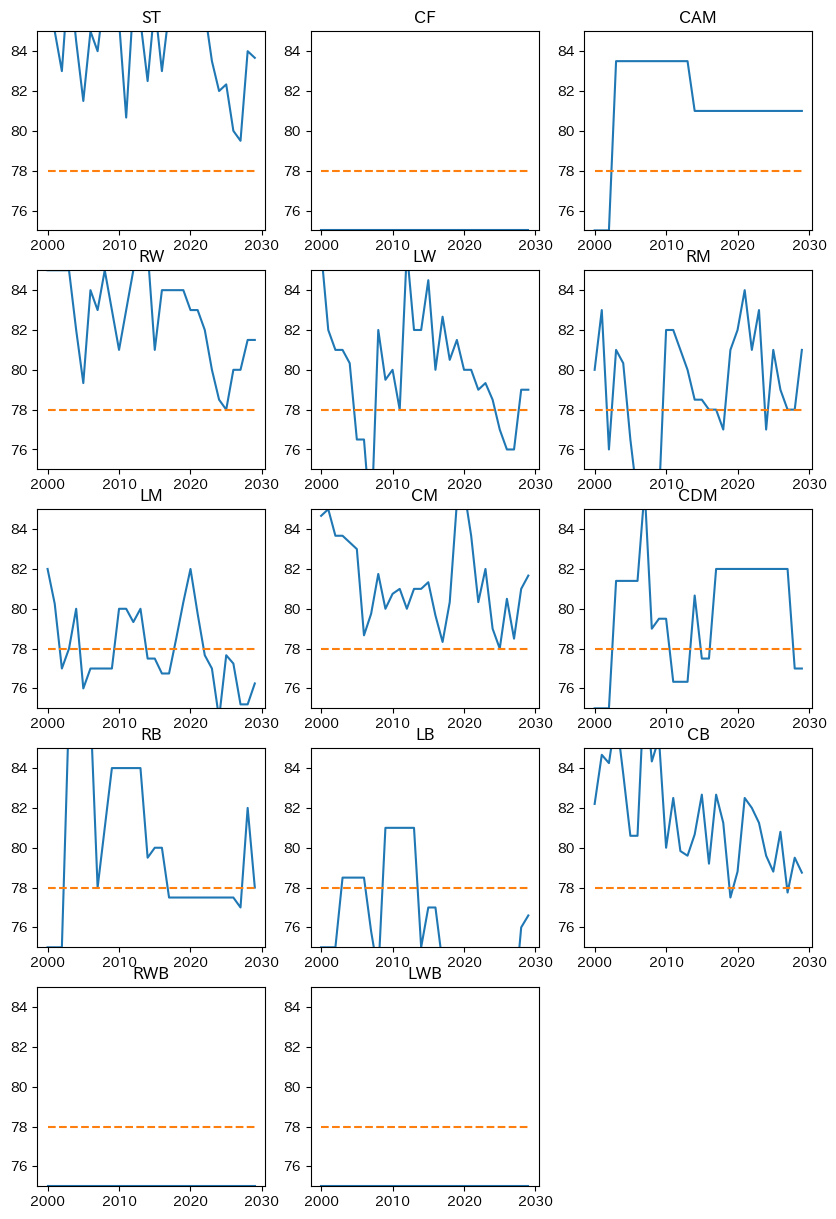

In [55]:
league_num = 0
output_ = output[output["リーグ"]==England.leagues[league_num].name]
dict_output = {}
dict_output["GK"] = []
for pos in ALL_POSITON:
    dict_output[pos] = [75]

for y in range(2000, end_year):
    output_y = output_[output_["年度"]==y]
    output_y_ = output_y[output_y["順位"]=="1位"]
    output_y_ = output_y_.groupby("ポジション").mean()["Rate"]
    
    for key in dict_output.keys():
        if key in output_y_.index:
            dict_output[key].append(output_y_[key])
        else:
            dict_output[key].append(dict_output[key][-1])

y = [year for year in range(2000, end_year)]
plt.figure(figsize=(10, 15))
for index, pos in enumerate(ALL_POSITON):
    plt.subplot(5, 3, index+1)
    plt.title(pos)
    plt.plot(y, dict_output[pos][1:])
    plt.ylim(75, 85)
    plt.plot(y, [78 for y in range(2000, end_year)], linestyle="dashed")
plt.show()

### チーム得点

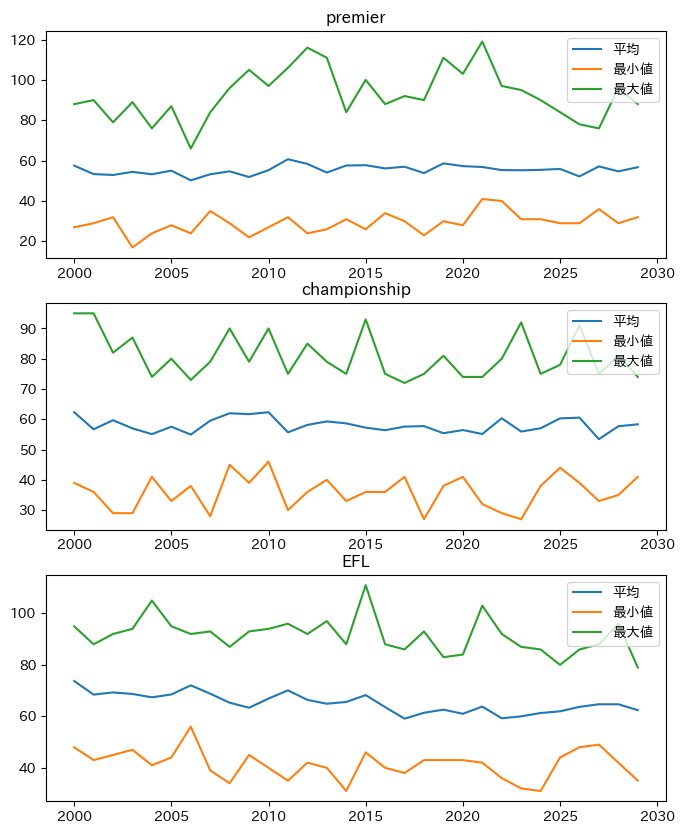

In [18]:
figure = plt.figure(figsize=(8, 10))
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = England.leagues[league_num].team_result[f"{England.leagues[league_num].name}_{year}"]
        me.append(output_["得点"].mean())
        mi.append(output_["得点"].min())
        ma.append(output_["得点"].max())
        st.append(output_["得点"].std())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{England.leagues[league_num].name}")
    plt.legend()
plt.show()

### 勝ち点

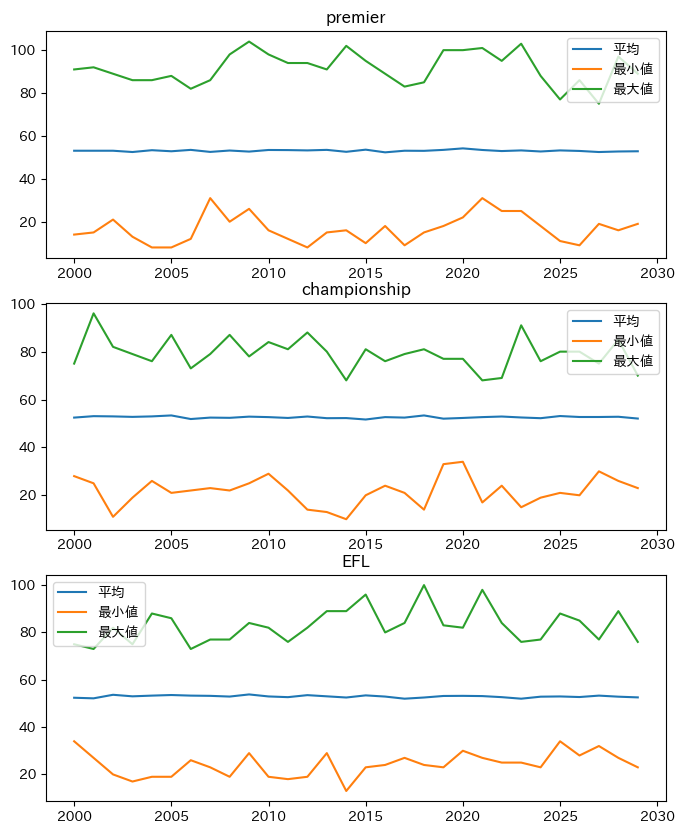

In [19]:
figure = plt.figure(figsize=(8, 10))
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = England.leagues[league_num].team_result[f"{England.leagues[league_num].name}_{year}"]
        me.append(output_["Points"].mean())
        mi.append(output_["Points"].min())
        ma.append(output_["Points"].max())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{England.leagues[league_num].name}")
    plt.legend()
plt.show()

In [20]:
output_

,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
Newcastle,23,8,7,75,34,41,76,1位,EFL
Basel,21,6,11,76,42,34,74,2位,EFL
Birmingham,21,7,10,79,47,32,73,3位,EFL
The Hague,21,8,9,67,49,18,72,4位,EFL
Blackburn,19,12,7,63,43,20,64,5位,EFL
Montevideo,18,10,10,70,53,17,64,6位,EFL
Budapest,18,11,9,68,54,14,63,7位,EFL
Bradford,16,10,12,78,55,23,60,8位,EFL
Edinburgh,17,13,8,68,54,14,59,9位,EFL
Cardiff,17,14,7,75,56,19,58,10位,EFL


## 引退年齢

In [21]:
all_member[(all_member["進退"]=="引退")].value_counts("年齢").sort_index()

年齢
24      3
25     65
26    109
27    320
28     47
29     77
30    145
31    280
32    386
33    511
34    591
35    504
36    348
37    234
38    122
39     29
40     10
41      2
dtype: int64

## 成長タイプ

In [22]:
all_member["成長タイプ"].value_counts()

general    4020
grass      1077
genius      600
legend       37
Name: 成長タイプ, dtype: int64

In [23]:
all_member[all_member["成長タイプ"]=="legend"].sort_values("年齢", ascending=False)

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
4702,Nickolai,Rotterdam,EFL,ce6c4d70-4aff-11ed-a99e-00155d479737,41,1982,GK,78,legend,15,15,15,15,15,15,引退
5083,Hesham,Rotterdam,EFL,dd98c422-4aff-11ed-a99e-00155d479737,40,1986,CB,75,legend,68,39,57,61,74,71,引退
4709,Fielding,Rotterdam,EFL,d4c18d70-4aff-11ed-a99e-00155d479737,39,1984,ST,78,legend,55,79,63,63,38,71,引退
3090,Ely,Rotterdam,EFL,ca296f7c-4aff-11ed-a99e-00155d479737,38,1982,CB,79,legend,62,36,64,65,79,74,引退
5499,Marcellus,Rotterdam,EFL,f5271184-4aff-11ed-a99e-00155d479737,37,1992,CM,75,legend,46,51,76,75,77,65,引退
4462,Walid,Rotterdam,EFL,d4bef4a2-4aff-11ed-a99e-00155d479737,37,1984,GK,71,legend,15,15,15,15,15,15,引退
2235,Mary,Rotterdam,EFL,ca34aa90-4aff-11ed-a99e-00155d479737,37,1982,CB,77,legend,56,55,69,70,77,75,引退
2971,Ravindra,Rotterdam,EFL,ca70e988-4aff-11ed-a99e-00155d479737,36,1982,RW,78,legend,80,68,66,78,32,36,引退
5089,Harlin,Rotterdam,EFL,ec573a70-4aff-11ed-a99e-00155d479737,36,1990,CB,75,legend,53,57,67,67,75,73,引退
4849,Jshawn,Rotterdam,EFL,e515571a-4aff-11ed-a99e-00155d479737,36,1988,CB,66,legend,62,61,56,56,64,63,引退


In [24]:
buff = output[output["分類"]=="レンタルリーグ"]
buff[buff["Rate"]>80].head(20)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,怪我回数,賞
33820,Buford,e8b7aefe-4aff-11ed-a99e-00155d479737,20,81,4,ST,rental_league,2010,rental_team,London,レンタルリーグ,記録なし,30,0,0,0,0,0,
40789,Xavi,e512356c-4aff-11ed-a99e-00155d479737,23,81,3,ST,rental_league,2012,rental_team,Kilmarnock,レンタルリーグ,記録なし,30,0,0,0,0,0,
44260,Bart,ec5c898a-4aff-11ed-a99e-00155d479737,22,81,3,ST,rental_league,2013,rental_team,Geneva,レンタルリーグ,記録なし,30,0,0,0,0,0,
58118,Robey,f12aa55a-4aff-11ed-a99e-00155d479737,25,81,2,ST,rental_league,2017,rental_team,Sunderland,レンタルリーグ,記録なし,30,0,0,0,0,0,
68472,Haynes,0c4a30a8-4b00-11ed-a99e-00155d479737,21,81,4,ST,rental_league,2020,rental_team,Vienna,レンタルリーグ,記録なし,30,0,0,0,0,0,
78902,Elson,179407fe-4b00-11ed-a99e-00155d479737,21,81,3,ST,rental_league,2023,rental_team,Wrexham,レンタルリーグ,記録なし,30,0,0,0,0,0,
85785,Sadam,04c218dc-4b00-11ed-a99e-00155d479737,28,82,2,ST,rental_league,2025,rental_team,Nottingham,レンタルリーグ,記録なし,30,0,0,0,0,0,


## レンタル選手

In [25]:
output[output["リーグ"]=="rental_league"]["Rate"].value_counts().sort_index()

50      2
51      1
52      3
53      4
54      9
55      9
56     21
57     56
58    137
59    277
60    441
61    565
62    619
63    663
64    622
65    635
66    668
67    675
68    657
69    627
70    582
71    495
72    378
73    289
74    221
75    166
76     96
77     85
78     80
79     40
80     19
81      6
82      1
Name: Rate, dtype: int64

In [26]:
output[output["リーグ"]=="rental_league"]["年齢"].value_counts().sort_index()

18    2052
19    1912
20    1498
21    1148
22     792
23     469
24     273
25     232
26     203
27      62
28      47
29      52
30      48
31      70
32      68
33      68
34      51
35      45
36      35
37      19
38       4
39       1
Name: 年齢, dtype: int64

In [27]:
p = search_player(England, all_member, uuid_)

NameError: name 'uuid_' is not defined

In [ ]:
uuid_ = "04c218dc-4b00-11ed-a99e-00155d479737"
print_player(England, all_member, uuid_)

In [ ]:
p.shooting_initial

In [ ]:
output